# Ridge and Lasso Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/combined_data/combined_data.csv")
df.head()

,AvgTemp,MaxTemp,MinTemp,SeaLevelPressure,AvgHumidity,TotalRainfallSnowmelt,AvgVisibility,AvgWindSpeed,MaxWindSpeed,RainDrizzle,Snow,ThunderStorm,Fog,PM 2.5
0,4.3,10.0,1.7,1023.1,94.0,0.00,8.0,13.0,22.2,0.0,0.0,0.0,0.0,40.080000
1,8.8,14.4,1.7,1021.4,89.0,0.00,10.3,8.9,20.6,0.0,0.0,0.0,0.0,42.400000
2,14.3,17.2,5.0,1016.6,84.0,0.76,12.4,15.2,24.1,0.0,0.0,0.0,0.0,31.250000
3,5.8,9.4,-2.2,1023.8,70.0,0.00,15.6,17.0,38.9,0.0,0.0,0.0,0.0,20.227273
4,2.1,4.0,-1.0,1025.9,49.0,0.00,16.1,20.9,29.4,0.0,0.0,0.0,0.0,17.100000


In [3]:
# split into dependent and independent features
X = df.iloc[:,:-1] # independent features
y = df.iloc[:,-1]  # dependent feature

#### Train test split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

### Comparison Linear Regression, Ridge Regression and Lasso Regression

#### Linear Regression

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [6]:
lr=LinearRegression()
mse=cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-49.76668718250441


#### Ridge Regression

In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [12]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50]},
             scoring='neg_mean_squared_error')

In [13]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-49.76668718250438


#### Lasso Regression

In [10]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [14]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40, 50]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X, y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46185.854164153905, tolerance: 11.982476303077611
  positive)
c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61794.06130564811, tolerance: 14.463489886252885
  positive)
c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75294.88970957069, tolerance: 17.69658057218831
  positive)
c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not c

{'alpha': 1e-15}
-49.76668718250144


c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84240.94304976893, tolerance: 20.140069919370973
  positive)


##### Hyperparameter tuning with help of Ridge and Lasso Regression almost didn't reduce an error

#### Model evaluation

In [16]:
prediction = lasso_regressor.predict(X_test)

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


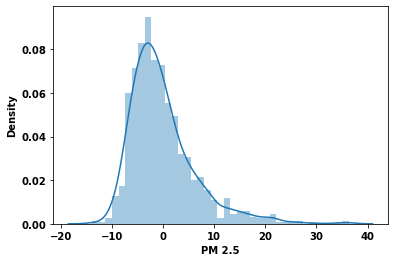

In [17]:
sns.distplot(y_test-prediction)

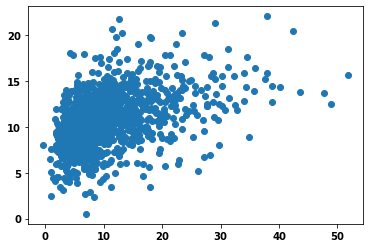

In [18]:
plt.scatter(y_test, prediction)

### Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\large\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error (MSE)** is the mean of the squared errors:

$$\large\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\large\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

#### Comparing these metrics:

**MAE** is the easiest to understand, because it's the average error.

**MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [20]:
from sklearn import metrics

In [21]:
print("MAE: ", metrics.mean_absolute_error(y_test, prediction))
print("MSE: ", metrics.mean_squared_error(y_test, prediction))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  4.713360483003939
MSE:  41.201783190372595
RMSE:  6.418861518242358


In [22]:
import pickle

In [23]:
# open file where you want to store the data
file = open("lasso_regression_model.pkl", "wb")

# dump information to that file
pickle.dump(lasso_regressor, file)